In [1]:
import csv
from random import randrange
import xgboost as xgb
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.ensemble import RandomForestClassifier
import time

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier as gbc
import xgboost as xgb
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier)

In [2]:
train = pd.read_csv("Train.csv")

In [3]:
train

,Kingdom,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,GUU,GUC,GUA,GUG,GCU,GCC,GCA,GCG,CCU,CCC,CCA,CCG,UGG,GGU,GGC,GGA,GGG,UCU,UCC,UCA,UCG,AGU,AGC,ACU,ACC,ACA,ACG,UAU,UAC,CAA,CAG,AAU,AAC,UGU,UGC,CAU,CAC,AAA,AAG,CGU,CGC,CGA,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,rod,1139,0.043869,0.035073,0.042635,0.001262,0.041777,0.032421,0.049396,0.007110,0.065917,0.046055,0.043550,0.006566,0.024868,0.009354,0.016534,0.004032,0.016706,0.024469,0.021511,0.009982,0.031805,0.019998,0.014429,0.012112,0.003553,0.013465,0.021215,0.038418,0.006901,0.016078,0.006382,0.040576,0.007292,0.008472,0.009022,0.017210,0.028778,0.037423,0.006782,0.028112,0.022912,0.019141,0.000037,0.022385,0.024059,0.013935,0.010187,0.014958,0.030018,0.030184,0.009450,0.008019,0.007330,0.017310,0.000544,0.005169,0.004311,0.023807,0.011808,0.017619,0.007039,0.000093,0.001189,0.029038
1,vrt,1012,0.013118,0.057591,0.022825,0.006641,0.025885,0.054591,0.095176,0.019620,0.023399,0.062736,0.033893,0.012634,0.007702,0.024325,0.016733,0.007503,0.013331,0.043944,0.031553,0.007485,0.008834,0.034751,0.033154,0.002121,0.004874,0.011927,0.024340,0.020616,0.014323,0.012755,0.030900,0.025705,0.003340,0.002980,0.009815,0.027256,0.046073,0.049161,0.015857,0.004117,0.018044,0.028931,0.002642,0.010981,0.036167,0.003762,0.015372,0.003436,0.022869,0.032610,0.003807,0.008335,0.012871,0.012357,0.009790,0.000674,0.007703,0.011224,0.015875,0.021296,0.001194,0.011095,0.004745,0.027767
2,vrl,1422,0.022753,0.024898,0.018039,0.027769,0.015621,0.017421,0.018036,0.017666,0.020898,0.024449,0.026945,0.035908,0.021845,0.020784,0.022888,0.028211,0.027254,0.013666,0.015743,0.022096,0.010105,0.010882,0.023443,0.016296,0.006551,0.028780,0.016369,0.025429,0.010628,0.014161,0.015318,0.015918,0.021844,0.016076,0.023455,0.025627,0.027996,0.017787,0.023861,0.021627,0.040316,0.019388,0.007835,0.029524,0.026432,0.016785,0.004851,0.015581,0.015275,0.027512,0.026689,0.016643,0.011712,0.014440,0.004222,0.016720,0.011105,0.028581,0.033062,0.032497,0.028295,0.004289,0.008880,0.004675
3,bct,1150215,0.012533,0.042499,0.002800,0.010396,0.014764,0.043486,0.004440,0.045591,0.010792,0.048955,0.006030,0.027335,0.009229,0.045752,0.010378,0.031397,0.010282,0.053835,0.016107,0.046562,0.006155,0.019669,0.004589,0.033741,0.014747,0.011308,0.060035,0.016808,0.014470,0.019526,0.016757,0.003776,0.021557,0.009253,0.017204,0.002920,0.027845,0.008217,0.027873,0.013167,0.013926,0.009634,0.024891,0.012324,0.023328,0.005855,0.018596,0.011661,0.011600,0.013233,0.032544,0.009205,0.042067,0.009500,0.019761,0.008620,0.012742,0.020680,0.037861,0.028382,0.042827,0.001758,0.000758,0.006248
4,vrl,3673,0.035727,0.030558,0.007909,0.035027,0.027608,0.033924,0.014007,0.022098,0.020782,0.018968,0.009662,0.020251,0.028003,0.026166,0.008566,0.033178,0.032618,0.032623,0.020462,0.015024,0.029455,0.018226,0.016676,0.014382,0.023300,0.037235,0.033505,0.012447,0.019009,0.026667,0.025664,0.016965,0.010594,0.012990,0.016507,0.018533,0.026390,0.018517,0.011232,0.012819,0.015288,0.022211,0.027916,0.011532,0.020162,0.016603,0.029207,0.031921,0.021357,0.023304,0.028013,0.011211,0.015014,0.013559,0.011595,0.006693,0.010629,0.026274,0.029869,0.018175,0.022948,0.008559,0.001079,0.005837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4704,pln,16973,0.027968,0.024691,0.012946,0.024973,0.032526,0.018383,0.011836,0.020166,0.034776,0.022933,0.013739,0.025323,0.026737,0.015722,0.018394,0.017780,0.029307,0.020107,0.030311,0.008674,0.019445,0.010136,0.021030,0.010682,0.026650,0.029477,0.018756,0.033834,0.014879,0.019879,0.011887,0.019772,0.012135,0.019699,0.019185,0.021371,0.013706,0.022338,0.006399,0.027124,0.014798,0.021618,0.016533,0.029911,0.021069,0.014571,0.012926,0.024395,0.014893,0.031190,0.042832,0.012823,0.017731,0.006832,0.011499,0.022870,0.

In [4]:
train = pd.read_csv("new_train.csv")

test = train[4500:5217]
train = train[:4500]


x_test=test

y_train = train[["Kingdom_float"]]
x_train = train.drop("Kingdom",axis=1)
x_train = x_train.drop("Kingdom_float", axis=1)

if "Kingdom_float" in test.columns:
  y_test = x_test[["Kingdom_float"]]
else:
  y_test = []

if "Kingdom" in x_test.columns:
  x_test = x_test.drop("Kingdom",axis=1)

if "Kingdom_float" in x_test.columns:
  x_test = x_test.drop("Kingdom_float", axis=1)

x_test_ids=[]

if"Id" in x_test.columns:
  test_id = x_test[["Id"]]
  x_test_ids = pd.DataFrame(test_id)
  x_test = x_test.drop("Id",axis=1)


print(x_train)
print(y_train)
print(x_test)
print(y_test)

      Ncodons       UUU       UUC  ...       UAA       UAG       UGA
0        1139  0.043869  0.035073  ...  0.000093  0.001189  0.029038
1        1012  0.013118  0.057591  ...  0.011095  0.004745  0.027767
2        1422  0.022753  0.024898  ...  0.004289  0.008880  0.004675
3     1150215  0.012533  0.042499  ...  0.001758  0.000758  0.006248
4        3673  0.035727  0.030558  ...  0.008559  0.001079  0.005837
...       ...       ...       ...  ...       ...       ...       ...
4495     1834  0.016830  0.026392  ...  0.003977  0.005823  0.011598
4496     3583  0.023744  0.021545  ...  0.007098  0.002947  0.009474
4497  1604841  0.038900  0.015344  ...  0.007987  0.005558  0.009680
4498     1134  0.101509  0.009626  ...  0.010097  0.001761  0.029354
4499     3769  0.031038  0.018839  ...  0.002757  0.006089  0.002928

[4500 rows x 65 columns]
      Kingdom_float
0               0.0
1               1.0
2               2.0
3               3.0
4               2.0
...             ...
4495  

# **feature tuning (NOT USED FOR TRAINING MODEL)**

**Attempt to remove the Ncodons (not done in the final model)**

In [ ]:

x_train=x_train.drop("Ncodons",axis=1)
x_test=x_test.drop("Ncodons",axis=1)

In [ ]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5000, 
                                        criterion ='entropy') 

X=x_train
y=y_train 

# Training the model 
extra_tree_forest.fit(X, y) 
  
# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_], 
                                        axis = 0) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


[0.01594443 0.01669964 0.01579993 0.01391531 0.02015449 0.01623923
 0.02957935 0.02017637 0.01789797 0.01737744 0.01829081 0.00984027
 0.01117774 0.01070105 0.01183076 0.01281201 0.01341228 0.02092696
 0.01334246 0.02268362 0.01116884 0.01395819 0.01540375 0.01662622
 0.01261909 0.01486628 0.01751341 0.0132672  0.0109471  0.01639247
 0.01307671 0.01162559 0.01061989 0.01110429 0.0108517  0.01356423
 0.01718464 0.02047563 0.01187811 0.01618903 0.01082607 0.01244944
 0.01574151 0.0122934  0.01136828 0.01993946 0.01592084 0.0129799
 0.00969133 0.0218283  0.02103105 0.01267152 0.01781648 0.01244262
 0.01391874 0.02473718 0.01997761 0.02664893 0.01756255 0.02225697
 0.01712904 0.00839726 0.00682468 0.02741232]


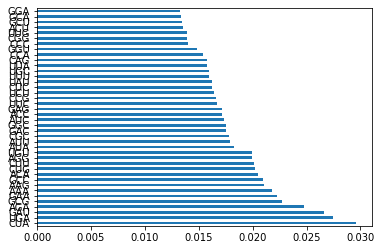

In [ ]:
import pandas as pd
import numpy as np
X=x_train
y=y_train
k=40

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(k).plot(kind='barh')
plt.show()

In [ ]:
feature_importance_normalized

array([0.00283533, 0.00603003, 0.01084759, 0.00703118, 0.01065336,
       0.0078099 , 0.01209803, 0.03577239, 0.01031999, 0.00776406,
       0.01798567, 0.01153778, 0.00970819, 0.00646848, 0.00390976,
       0.00387022, 0.00763528, 0.00412343, 0.01180857, 0.00435587,
       0.0145907 , 0.00406165, 0.00873168, 0.01108966, 0.01287005,
       0.01142646, 0.010011  , 0.01064938, 0.00467951, 0.00249418,
       0.00741522, 0.00734829, 0.00702192, 0.00751026, 0.00865446,
       0.00332557, 0.00599541, 0.01131936, 0.01467088, 0.00740699,
       0.00645642, 0.00286552, 0.00394192, 0.01067754, 0.00847661,
       0.00389805, 0.00874207, 0.00504181, 0.00563701, 0.0059812 ,
       0.00886061, 0.0178755 , 0.00953654, 0.01305351, 0.00486934,
       0.00555995, 0.01781131, 0.01239427, 0.02290955, 0.00745951,
       0.01195809, 0.01627619, 0.00169471, 0.00146867, 0.03381902])

In [ ]:
CUA    0.035661
UGA    0.033519
GAU    0.023655
AGA    0.018560
AUC    0.017727
AAG    0.017362
GAG    0.016186
ACA    0.015141
GCG    0.014000
CGC    0.013083
CCG    0.012799
CUC    0.012719
AGG    0.012273
GCC    0.012272
GAA    0.012227
UGG    0.011690
ACC    0.011451
AUA    0.011349
UUG    0.011002
CAG    0.010861
dtype: float64

SyntaxError: ignored

**Not Included in final model, trained on all features since there was slight dip in accuracy**

In [ ]:
col = feature_cols

x_train = x_train[col]
x_test = x_test[col]
x_train.shape
x_test.shape



NameError: ignored

# **Feature Scaling and Imbalance class handling using SMOTE**

In [5]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
x_train = feature_scaler.fit_transform(x_train)
x_test = feature_scaler.transform(x_test)

print(x_train)
print(x_test)

[[-0.09228695  0.83248594  0.62616395 ... -1.60260706 -1.07925236
   1.76935798]
 [-0.09242528 -0.86899891  2.49320936 ...  1.59138538  0.0691102
   1.65055148]
 [-0.09197869 -0.33586855 -0.21748849 ... -0.38444     1.4045098
  -0.50834955]
 ...
 [ 1.65455282  0.55755261 -1.00965623 ...  0.68893454  0.33173179
  -0.0404584 ]
 [-0.09229239  4.02176643 -1.48380341 ...  1.30147596 -0.89468986
   1.79888338]
 [-0.08942221  0.12254656 -0.71990216 ... -0.82919319  0.5033134
  -0.67171493]]
[[-0.08980454 -0.38883047  1.4901448  ... -0.43651599 -0.12557691
  -0.25737203]
 [-0.08299016 -0.37354245 -1.15707693 ... -0.00802331  1.30371541
  -0.73484702]
 [-0.09064435 -0.22055049  0.03755384 ... -0.57955701 -0.72502858
  -0.5859053 ]
 ...
 [-0.08488328  0.3631574  -0.68201828 ... -1.26770181 -0.59237615
  -0.76734372]
 [-0.09097766  0.29692601 -0.98879839 ... -1.08657874 -0.39189898
  -0.0814014 ]
 [-0.08659886  0.94173064 -0.86450429 ... -0.59678025 -0.70094683
  -0.43753021]]


In [ ]:
pip install imbalanced-learn

In [6]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(10934, 64)
(10934,)


# **Model Training**

**different algorithms params**

In [ ]:

#xg_boost
xg_p = {'max_depth': [100],  
              'alpha' : [0.01,0.1],
              'learning_rate' : [0.01],
              'n_estimators' : [200],
              'colsample_bytree':[0.3],
              'nthread': [-1]} 
# not used
svc_p = {
    'kernel': ('linear','poly','rbf','sigmoid'),
    'decision_function_shape': ('ovo','ovr'),
    'C': (0.1,0.5, 2.0,5.0,10.0)
  } 

# Extra Trees Parameters
et_p = {

    'n_jobs': [-1],
    'n_estimators':[200],
    'max_features':['auto','sqrt'],
    'class_weight':['balanced_subsample']
}


# Random Forest parameters
rf_p = {
  
'n_jobs': [-1],
    'n_estimators': [500],
    'max_depth': [500],
     'max_features':['sqrt']
}


In [ ]:
print(x_train.shape)
print(x_test.shape)

(10934, 65)
(711, 65)


**Tried Extra Tree , Random Forest and SVM

1.   List item
2.   List item

great)**

**Extra Trees Classifier**

In [ ]:
# print('training model Extra Trees')
grid_clf = GridSearchCV(ExtraTreesClassifier()
      ,et_p, refit = True, verbose = 3,cv=StratifiedKFold(n_splits=2, 
                        random_state=42).split(x_train, y_train)) 

grid_clf.fit(x_train, y_train)
y_preds = grid_clf.predict(x_test)
report = classification_report(y_test, y_preds)
print(report)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] class_weight=balanced_subsample, max_features=auto, n_estimators=200, n_jobs=-1 
[CV]  class_weight=balanced_subsample, max_features=auto, n_estimators=200, n_jobs=-1, score=0.943, total=   2.1s
[CV] class_weight=balanced_subsample, max_features=auto, n_estimators=200, n_jobs=-1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  class_weight=balanced_subsample, max_features=auto, n_estimators=200, n_jobs=-1, score=0.957, total=   2.2s
[CV] class_weight=balanced_subsample, max_features=sqrt, n_estimators=200, n_jobs=-1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


[CV]  class_weight=balanced_subsample, max_features=sqrt, n_estimators=200, n_jobs=-1, score=0.940, total=   2.0s
[CV] class_weight=balanced_subsample, max_features=sqrt, n_estimators=200, n_jobs=-1 
[CV]  class_weight=balanced_subsample, max_features=sqrt, n_estimators=200, n_jobs=-1, score=0.957, total=   2.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.4s finished


              precision    recall  f1-score   support

         0.0       0.75      0.25      0.38        12
         1.0       0.93      0.87      0.90       104
         2.0       0.78      0.91      0.84       155
         3.0       0.87      0.93      0.90       174
         4.0       0.81      0.81      0.81       129
         5.0       0.82      0.62      0.71        76
         6.0       0.71      0.80      0.75        30
         7.0       0.91      0.71      0.80        14
         8.0       0.57      0.44      0.50         9
         9.0       1.00      0.50      0.67         8

    accuracy                           0.83       711
   macro avg       0.81      0.68      0.72       711
weighted avg       0.83      0.83      0.82       711



**Random Forest Classifier**

In [ ]:
# print('training model Extra Trees')
grid_clf = GridSearchCV(RandomForestClassifier()
      ,rf_p, refit = True, verbose = 3,cv=StratifiedKFold(n_splits=2, 
                        random_state=42).split(x_train, y_train)) 

grid_clf.fit(x_train, y_train)
y_rf_preds = grid_clf.predict(x_test)
report = classification_report(y_test, y_rf_preds)
print(report)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] max_depth=500, max_features=sqrt, n_estimators=500, n_jobs=-1 ...


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=500, max_features=sqrt, n_estimators=500, n_jobs=-1, score=0.935, total=  16.5s
[CV] max_depth=500, max_features=sqrt, n_estimators=500, n_jobs=-1 ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.5s remaining:    0.0s


[CV]  max_depth=500, max_features=sqrt, n_estimators=500, n_jobs=-1, score=0.955, total=  15.9s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   32.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   32.5s finished


              precision    recall  f1-score   support

         0.0       0.50      0.17      0.25        12
         1.0       0.94      0.88      0.91       104
         2.0       0.80      0.90      0.85       155
         3.0       0.85      0.91      0.88       174
         4.0       0.83      0.88      0.86       129
         5.0       0.84      0.63      0.72        76
         6.0       0.75      0.80      0.77        30
         7.0       0.73      0.57      0.64        14
         8.0       0.62      0.56      0.59         9
         9.0       0.80      0.50      0.62         8

    accuracy                           0.84       711
   macro avg       0.77      0.68      0.71       711
weighted avg       0.83      0.84      0.83       711



**Xg_boost Classifier**

In [ ]:
grid_clf = GridSearchCV(xgb.XGBClassifier(objective="multi:softprob",subsample=0.5,nthread= -1)   
      ,xg_p, refit = True, verbose = 3,cv=StratifiedKFold(n_splits=2, 
                        random_state=42).split(x_train, y_train)) 

grid_clf.fit(x_train, y_train)
y_xg_preds = grid_clf.predict(x_test)
report = classification_report(y_test, y_xg_preds)
print(report)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] alpha=0.01, colsample_bytree=0.3, learning_rate=0.01, max_depth=100, n_estimators=200, nthread=-1 
[CV]  alpha=0.01, colsample_bytree=0.3, learning_rate=0.01, max_depth=100, n_estimators=200, nthread=-1, score=0.917, total=  35.3s
[CV] alpha=0.01, colsample_bytree=0.3, learning_rate=0.01, max_depth=100, n_estimators=200, nthread=-1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.3s remaining:    0.0s


[CV]  alpha=0.01, colsample_bytree=0.3, learning_rate=0.01, max_depth=100, n_estimators=200, nthread=-1, score=0.942, total=  36.0s
[CV] alpha=0.1, colsample_bytree=0.3, learning_rate=0.01, max_depth=100, n_estimators=200, nthread=-1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV]  alpha=0.1, colsample_bytree=0.3, learning_rate=0.01, max_depth=100, n_estimators=200, nthread=-1, score=0.917, total=  35.2s
[CV] alpha=0.1, colsample_bytree=0.3, learning_rate=0.01, max_depth=100, n_estimators=200, nthread=-1 
[CV]  alpha=0.1, colsample_bytree=0.3, learning_rate=0.01, max_depth=100, n_estimators=200, nthread=-1, score=0.942, total=  36.1s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.4min finished


              precision    recall  f1-score   support

         0.0       0.50      0.17      0.25        12
         1.0       0.93      0.86      0.89       104
         2.0       0.81      0.90      0.85       155
         3.0       0.87      0.89      0.88       174
         4.0       0.85      0.87      0.86       129
         5.0       0.80      0.70      0.75        76
         6.0       0.74      0.77      0.75        30
         7.0       0.69      0.79      0.73        14
         8.0       0.56      0.56      0.56         9
         9.0       0.67      0.50      0.57         8

    accuracy                           0.83       711
   macro avg       0.74      0.70      0.71       711
weighted avg       0.83      0.83      0.83       711



**logistic regression classifier**

In [ ]:
from sklearn.linear_model import LogisticRegression

p = {'multi_class':['auto'],
     'penalty': ['l2'],
     'class_weight':['balanced'],
     #'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
     'solver' : ['lbfgs'],
     'max_iter': [1000],
     'C':[100]
     }

grid_clf = GridSearchCV(
    LogisticRegression(),
    p,
    cv=StratifiedKFold(n_splits=2, 
                        random_state=42,shuffle=True).split(x_train, y_train))

grid_clf.fit(x_train, y_train)
y_xg_preds = grid_clf.predict(x_test)
report = classification_report(y_test, y_xg_preds)
print(report)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


              precision    recall  f1-score   support

         0.0       0.17      0.33      0.23        12
         1.0       0.90      0.78      0.84       104
         2.0       0.83      0.85      0.84       155
         3.0       0.88      0.75      0.81       174
         4.0       0.79      0.64      0.71       129
         5.0       0.47      0.54      0.50        76
         6.0       0.62      0.60      0.61        30
         7.0       0.27      0.43      0.33        14
         8.0       0.28      0.78      0.41         9
         9.0       0.42      0.62      0.50         8
        10.0       0.00      0.00      0.00         0

    accuracy                           0.71       711
   macro avg       0.51      0.58      0.53       711
weighted avg       0.77      0.71      0.73       711



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**SVC trained model**

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
 
# defining parameter range 
 
# grid_lr= make_pipeline(StandardScaler(),
#  SVC(kernel='rbf',tol=0.0001,C=100,max_iter=3000))
 
p = {
    'kernel':['rbf'],
     'tol': [0.00001,0.000001,0.000001],
     'C': [1,10,100],
     'max_iter': [3000],
     'decision_function_shape': ['ovo'],
     'gamma':['auto'],
     #'loss':['hinge']
     'class_weight': [ {
         0:5,
         1:0.25,
         2:0.25,
         3:0.25,
         4:0.25,
         5:0.5,
         6:0.5,
         7:5,
         8:5,
         9:5} ]
     }

grid_clf = GridSearchCV(
    SVC(),
    p,
    cv=StratifiedKFold(n_splits=2, 
                        random_state=42,shuffle=True).split(x_train, y_train))

grid_clf.fit(x_train, y_train)
final_model=grid_clf
y_xg_preds = grid_clf.predict(x_test)
report = classification_report(y_test, y_xg_preds)
print(report)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_

              precision    recall  f1-score   support

         0.0       0.57      0.33      0.42        12
         1.0       0.93      0.95      0.94       104
         2.0       0.89      0.91      0.90       155
         3.0       0.91      0.93      0.92       174
         4.0       0.87      0.88      0.87       129
         5.0       0.82      0.82      0.82        76
         6.0       0.83      0.80      0.81        30
         7.0       0.62      0.57      0.59        14
         8.0       0.75      0.67      0.71         9
         9.0       1.00      0.62      0.77         8

    accuracy                           0.88       711
   macro avg       0.82      0.75      0.78       711
weighted avg       0.87      0.88      0.88       711



In [ ]:
base_predictions_train = pd.DataFrame( {
     
     'RandomForest': y_rf_preds,
     'ExtraTrees': y_preds,
     'xgBoost' : y_xg_preds
    })
base_predictions_train.head(100)

,RandomForest,ExtraTrees,xgBoost
0,8.0,8.0,8.0
1,3.0,3.0,3.0
2,2.0,2.0,2.0
3,2.0,2.0,2.0
4,2.0,2.0,2.0
...,...,...,...
95,2.0,2.0,2.0
96,1.0,1.0,1.0
97,3.0,3.0,3.0
98,4.0,4.0,4.0


In [ ]:
base_predictions_train['max_freq'] = base_predictions_train.agg(lambda x: x.mode() if x.mode().size==1 else x['xgBoost'], axis=1)
y_preds = base_predictions_train['max_freq']
print(y_preds)

0      8.0
1      3.0
2      2.0
3      2.0
4      2.0
      ... 
706    3.0
707    1.0
708    2.0
709    2.0
710    2.0
Name: max_freq, Length: 711, dtype: float64


# **Save result**

# **standardize features for svm**

In [ ]:
def standardize(x_train,x_test):
  from sklearn.preprocessing import StandardScaler
  feature_scaler = StandardScaler()
  x_train = feature_scaler.fit_transform(x_train)
  x_test = feature_scaler.transform(x_test)
  return x_test

In [ ]:
def save_test_results(y_preds,test,filename):

    test_id = test["Id"]

    df = pd.concat([pd.DataFrame(test_id),pd.DataFrame(y_preds)],axis=1)

    
    df = df.rename(columns={0: 'Kingdom'})
    pd.set_option('display.max_rows', df.shape[0]+1)
    print(df.head(300))

    df.to_csv(filename,index=False)

In [ ]:
def get_kingdom_dict():

    kingdom=dict()

    with open('kingdom_lookup.txt') as f:
        val = f.readlines()

        for v in val:

            key_pair = v.split(',')
            val= str(key_pair[0].strip())
            key = float(key_pair[1].strip())

            kingdom[val]=key

    return kingdom

In [ ]:

def convert_preds_float_to_str(preds):

    kingdom = get_kingdom_dict()
    rev_kingdom_dic =dict()

    for k,v in kingdom.items():

        rev_kingdom_dic[v]=k

    print(preds.shape)
    new_preds = np.empty(preds.shape,dtype=object)

    print(new_preds.size)

    for i, val in enumerate(preds):
        if val in rev_kingdom_dic:
            new_preds[i] = rev_kingdom_dic[val]

    print(new_preds)

    return new_preds


In [ ]:

def convert_kingdom_to_float(label):

    kingdom = get_kingdom_dict()

    for i,val in enumerate(label.values):
        if val[0] in kingdom:
            val[0] = kingdom[val[0]]

    return label

In [ ]:

test = pd.read_csv("Test.csv")

#f_test=test.drop("Ncodons",axis=1)
f_test=test.drop("Id",axis=1)
print(f_test.head(10))
x_train=x_train
f_test=feature_scaler.transform(f_test)
f_test=standardize(x_train,f_test)
y_preds = final_model.predict(f_test)
print(y_preds)
y_preds = convert_preds_float_to_str(y_preds)



save_test_results(y_preds,test,"result.csv")

NameError: ignored